In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

In [6]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [7]:
%matplotlib inline

In [8]:
features, target = load_wine(return_X_y=True)  # 三分类酒数据集
features.shape, target.shape

((178, 13), (178,))

In [10]:
RANDOM_STATE = 42
# 将数据集切分成7:3分别作为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=RANDOM_STATE)

In [11]:
# 不适用PCA
raw_clf = make_pipeline(StandardScaler(), LogisticRegression())
raw_clf.fit(X_train, y_train)
pred_test_raw = raw_clf.predict(X_test)

In [13]:
# 使用PCA但不做数据标准化
unscaled_clf = make_pipeline(PCA(n_components=2), LogisticRegression())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

In [15]:
# 使用PCA并且也做数据标准化
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [22]:
# 查看各情况下的分类准确率
print('不使用PCA,预测准确率{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_raw)))
print('使用PCA但不进行数据标准化,预测准确率{:.2%}'.format( metrics.accuracy_score(y_test, pred_test)))
print('使用PCA并且进行数据标准化,预测准确率{:.2%}'.format( metrics.accuracy_score(y_test, pred_test_std)))

不使用PCA,预测准确率98.15%
使用PCA但不进行数据标准化,预测准确率74.07%
使用PCA并且进行数据标准化,预测准确率98.15%


In [23]:
# 将PCA信息抽取出来
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

In [25]:
# 打印最主要的主成分，注意，它是特征空间中的主成分轴，表达了数据中具有最大方差的方向
print('未预处理第一主成分：',pca.components_[0])
print('预处理第一主成分：',pca_std.components_[0])

未预处理第一主成分： [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]
预处理第一主成分： [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


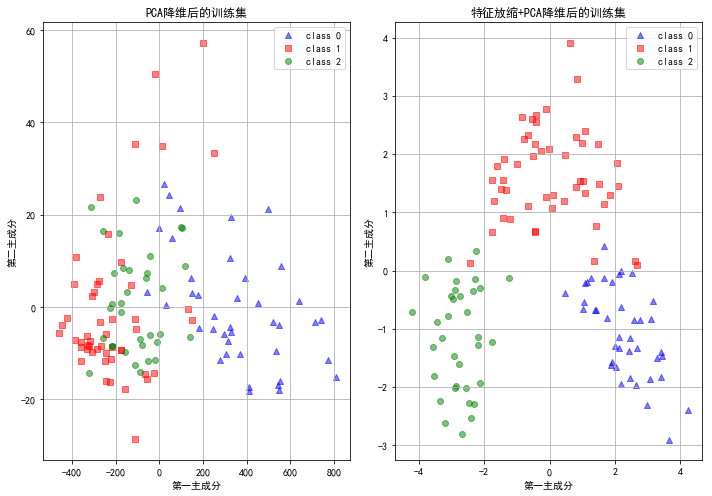

In [28]:
# 对训练数据进行PCA降维以备绘图
X_train_nostd = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

FIG_SIZE = (10,7)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

# 不做预处理的PCA
for l, c, m in zip(range(0,3), ('blue','red','green'), ('^','s','o')):
    ax1.scatter(X_train_nostd[y_train == l, 0], X_train_nostd[y_train == l,1],
               color = c,
               label = 'class %s' % l,
               alpha = 0.5,
               marker = m
               )
    
# 不做预处理的PCA
for l, c, m in zip(range(0,3), ('blue','red','green'), ('^','s','o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l,1],
               color = c,
               label = 'class %s' % l,
               alpha = 0.5,
               marker = m
               )
    
ax1.set_title('PCA降维后的训练集')
ax2.set_title('特征放缩+PCA降维后的训练集')

for ax in (ax1, ax2):
    ax.set_xlabel('第一主成分')
    ax.set_ylabel('第二主成分')
    ax.legend(loc='upper right')
    ax.grid()
    
plt.tight_layout()